- Used sentence transformers to compute embeddings for a large text corpus
- We found the K Nearest Neighbours(KNN) for input sentences
- Applied sentence augmenters based on replacing synonyms with the most similar alternative
- We then found number of common embeddings for these augmented sentences with the original sentence to compute an S-score
- We had hoped that this S-score would show differences between formal and informal sentences.

In [1]:
import numpy as np

In [2]:
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

In [3]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

In [4]:

sentences = ["She wanted to test the part-time job out cautiously before committing fully and quitting her full-time job.",
     "She decided to test the waters by taking on a part-time job before quitting her full-time job.",
     "She decided to try out the waters by taking on a part-time job before quitting her full-time job.",
     "She decided to test the pool by taking on a part-time job before quitting her full-time job.",
    "This is an example sentence.",
    "Another example sentence.",
    "BERT embeddings clustering is cool.",
    "Machine learning is a subset of artificial intelligence.",
    "Natural language processing is a fascinating field.",
    "Deep learning models are becoming more sophisticated.",
    "Data science involves extracting insights from data.",
    "Reinforcement learning is used in training autonomous agents.",
    "The internet of things connects devices and data.",
    "Artificial neural networks mimic the human brain.",
    "Quantum computing has the potential to revolutionize computing.",
    "Statistical analysis is crucial for making data-driven decisions.",
    "Cloud computing provides scalable and flexible resources.",
    "Blockchain technology ensures secure and transparent transactions.",
    "Virtual reality immerses users in digital environments.",
    "Augmented reality overlays digital information on the real world.",
    "Big data analytics handles large volumes of data for insights.",
    "Cybersecurity is essential to protect digital assets.",
    "Ethical considerations are important in technology development.",
    "The future of technology is exciting and full of possibilities.",
    "The sky is blue.",
    "I love programming.",
    "Cats are adorable.",
    "Python is a versatile language.",
    "The beach is so relaxing.",
    "Music brings people together.",
    "Learning is a lifelong journey.",
    "Books open up new worlds.",
    "The sun sets in the west.",
    "Coffee fuels my mornings.",
    "Laughter is contagious.",
    "Rainy days are perfect for reading.",
    "Mountains are majestic.",
    "Artistic expression is important.",
    "Education is the key to success.",
    "Family is where life begins.",
    "Traveling broadens the mind.",
    "Friendship is a precious gift.",
    "The internet connects us all.",
    "Success requires hard work.",
    "The moon lights up the night sky.",
    "Happiness comes from within.",
    "Nature is full of beauty.",
    "Time heals all wounds.",
    "The start is always the hardest.",
    "Kindness costs nothing.",
    "Failure is a stepping stone to success.",
    "Patience is a virtue.",
    "Dream big, achieve bigger.",
    "Change is the only constant.",
    "The world is full of possibilities.",
    "Actions speak louder than words.",
    "Imagination knows no bounds.",
    "Learning from mistakes is important.",
    "A smile brightens up any day.",
    "Innovation drives progress.",
    "The future is what we make it.",
    "Dance like nobody's watching.",
    "The ocean is full of wonders.",
    "Challenges make us stronger.",
    "Love knows no boundaries.",
    "Simplicity is the ultimate sophistication.",
    "Courage leads to success.",
    "Empathy makes the world better.",
    "The sun also rises.",
    "Stay curious, stay learning.",
    "The only limit is your mind.",
    "Resilience conquers adversity.",
    "Kindness is a language everyone understands.",
    "Believe you can and you're halfway there.",
    "Adventure awaits those who seek it.",
    "Life is a journey, not a destination.",
    "Nature has a calming effect.",
    "Determination overcomes obstacles.",
    "Success is sweetest after struggle.",
    "Every day is a second chance.",
    "Wisdom comes with experience.",
    "Find joy in the little things.",
    "The best is yet to come.",
    "A positive attitude changes everything.",
    "Create, don't just consume.",
    "Stay focused and never give up.",
    "Knowledge is power.",
    "Inspiration can be found everywhere.",
    "Celebrate the present moment.",
    "Don't just dream, take action.",
    "Miracles happen every day.",
    "The Earth is our home.",
    "Make each day your masterpiece.",
    "Laughter is the best medicine.",
    "Find strength in adversity.",
    "Listen more, speak less.",
    "Home is where the heart is.",
    "Strive for progress, not perfection.",
    "Your attitude determines your direction.",
    "The pen is mightier than the sword.",
    "Be the change you wish to see.",
    "Be yourself, everyone else is taken.",
    "Success starts with a single step.",
    "Stay humble and kind.",
    "Perseverance leads to success.",
    "Seize the day!",
    "Life is what you make it.",
    "A journey of a thousand miles begins with a single step.",
    "Follow your passions.",
    "Dreams are meant to be chased.",
    "The past does not define the future.",
    "Embrace the unknown with courage.",
    "Compassion makes the world brighter.",
    "Discover the beauty in diversity.",
    "Keep pushing your limits.",
    "Learn from the past, live in the present, plan for the future.",
    "The greatest risk is not taking any risks.",
    "Find happiness within yourself.",
    "Stay hungry for knowledge.",
    "Live and let live.",
    "You are capable of amazing things.",
    "Mistakes are proof that you're trying.",
    "Be the hero of your own story.",
    "Spread positivity wherever you go.",
]

In [5]:
print(len(sentences))

124


In [6]:
def embed(s):
    lst = s.split()
    l = len(lst)
    sentence = np.zeros(768)
    
    for i in range(0, l - 2):
        sub_sentence = " ".join(lst[i:i+3])
        sub_embedding = sbert_model.encode(sub_sentence)
        sentence += sub_embedding
    
    divisor = l - 2
    result_vector = sentence / divisor
    return result_vector

In [7]:
for s in sentences:
    print(s)

She wanted to test the part-time job out cautiously before committing fully and quitting her full-time job.
She decided to test the waters by taking on a part-time job before quitting her full-time job.
She decided to try out the waters by taking on a part-time job before quitting her full-time job.
She decided to test the pool by taking on a part-time job before quitting her full-time job.
This is an example sentence.
Another example sentence.
BERT embeddings clustering is cool.
Machine learning is a subset of artificial intelligence.
Natural language processing is a fascinating field.
Deep learning models are becoming more sophisticated.
Data science involves extracting insights from data.
Reinforcement learning is used in training autonomous agents.
The internet of things connects devices and data.
Artificial neural networks mimic the human brain.
Quantum computing has the potential to revolutionize computing.
Statistical analysis is crucial for making data-driven decisions.
Cloud c

In [8]:
sentence_embeddings=[]
for s in sentences:
    sentence_embeddings.append(embed(s))

print('Sample BERT embedding vector - length', len(sentence_embeddings[0]))
# print('Sample BERT embedding vector - note includes negative values', sentence_embeddings[0])
len(sentence_embeddings)

Sample BERT embedding vector - length 768


124

In [9]:
sentence_embeddings[123]

array([-2.16662360e-01, -4.63817587e-01,  2.67751892e+00,  4.44993963e-01,
        6.90312505e-01, -4.85820939e-01, -8.26238354e-01,  8.99875879e-01,
        5.05570124e-01, -3.66523646e-01, -8.14572394e-01,  5.23707310e-01,
        2.80863966e-02,  2.14932821e-01,  1.32937769e+00,  2.74734189e-01,
       -4.99239226e-01, -3.43539342e-01, -8.14078661e-02, -5.72722226e-01,
       -1.21671890e-01,  3.92550667e-01, -6.58886453e-01, -8.57166469e-01,
       -2.74525081e-01, -9.00271932e-01,  1.49889109e-01, -1.31806731e+00,
       -6.81302379e-01,  1.78431869e-01, -2.38766948e-01,  3.38293829e-01,
        5.60491463e-01, -8.35059782e-01,  3.59775573e-02,  5.42597135e-01,
        3.58742741e-02,  4.64862883e-01, -1.79388964e-01, -4.99451349e-01,
        8.44086727e-01,  3.68773565e-02,  8.40416829e-01, -2.49911830e-01,
       -6.65789247e-01, -6.84069127e-01, -4.69168033e-02,  3.26650014e-01,
        1.53614969e-01, -7.92562038e-01,  1.59098784e-01, -5.40873349e-01,
        1.38654686e-01,  

In [10]:
reference_embedding = sentence_embeddings[0]

for i in range(1, len(sentences)):
    sim = cosine(reference_embedding, sentence_embeddings[i])
    print("Sentence =", sentences[i], "; similarity =", sim)


Sentence = She decided to test the waters by taking on a part-time job before quitting her full-time job. ; similarity = 0.9499812633468425
Sentence = She decided to try out the waters by taking on a part-time job before quitting her full-time job. ; similarity = 0.9454088215823077
Sentence = She decided to test the pool by taking on a part-time job before quitting her full-time job. ; similarity = 0.9343081857945447
Sentence = This is an example sentence. ; similarity = 0.7516503609609869
Sentence = Another example sentence. ; similarity = 0.7174621032938842
Sentence = BERT embeddings clustering is cool. ; similarity = 0.6608726459007593
Sentence = Machine learning is a subset of artificial intelligence. ; similarity = 0.7656481593090728
Sentence = Natural language processing is a fascinating field. ; similarity = 0.7132207842069621
Sentence = Deep learning models are becoming more sophisticated. ; similarity = 0.7582219192204852
Sentence = Data science involves extracting insights fr

In [11]:
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

c:\Users\siddh\anaconda3\envs\project\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


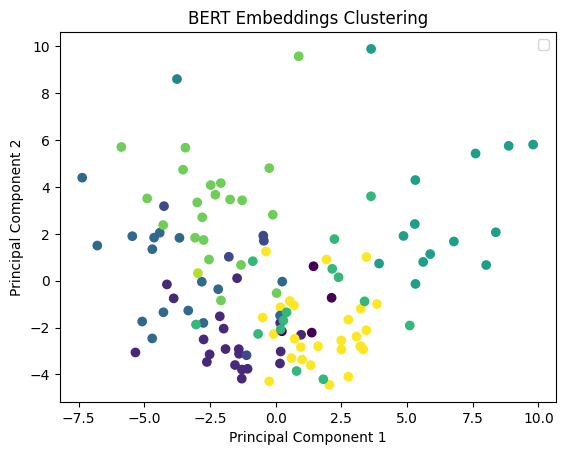

In [12]:
# Convert embeddings to a format suitable for clustering
data_points = np.vstack(sentence_embeddings)

# Set environment variable to mitigate memory leak issue
os.environ['OMP_NUM_THREADS'] = '1'

# Create KMeans object with n_init parameter
kmeans = KMeans(n_clusters=10, n_init=10)
kmeans.fit(data_points)
cluster_centers = kmeans.cluster_centers_

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_embeddings = pca.fit_transform(data_points)

# Create a 2D scatter plot to visualize clusters
plt.scatter(pca_embeddings[:, 0], pca_embeddings[:, 1], c=kmeans.labels_, cmap='viridis')
# plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], color='red', marker='x', s=100, label='Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('BERT Embeddings Clustering')
plt.legend()
plt.show()

In [13]:
import nltk
from nltk.corpus import wordnet

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\siddh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
def find_closest_synonyms(word, num_synonyms=10):
    synonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
    # Remove duplicates
    synonyms = list(set(synonyms))
    
    # If available synonyms are fewer than num_synonyms, use all available synonyms
    num_synonyms = min(num_synonyms, len(synonyms))
    
    # Select num_synonyms synonyms
    selected_synonyms = synonyms[:num_synonyms]
    
    return selected_synonyms

In [15]:
find_closest_synonyms("more")

['Sir_Thomas_More',
 'Thomas_More',
 'More',
 'more',
 'to_a_greater_extent',
 'more_than']

In [16]:
import spacy

nlp = spacy.load("en_core_web_lg")  # Load the medium English model

In [17]:
def remove_underscores(synonyms):
    cleaned_synonyms = [syn.replace('_', ' ') for syn in synonyms]
    return cleaned_synonyms

In [18]:
def find_most_sim(word,synonyms):
    maxsim=0
    sim=0
    fsyn=""
    for syn in synonyms:
        if (word.lower() not in syn.lower()) and (syn.lower() not in word.lower()):
            sim=nlp(word).similarity(nlp(syn))
            if sim>maxsim:
                maxsim=sim
                fsyn=syn

    return fsyn,maxsim

In [19]:
import random

In [20]:
def select_random(sentence):
    doc = nlp(sentence)
    words = [token.text for token in doc if token.pos_ in ['VERB']]
    if(len(words)==0):
        return doc[random.randrange(len(sentence.split()))].text
    random_word_index = random.randrange(len(words))  # Generate a random index
    random_word = words[random_word_index]
    return random_word

In [21]:
def replace_w_aug(sentence):
    word=select_random(sentence)
    final,simval = find_most_sim(word,remove_underscores(find_closest_synonyms(word)))
    l=sentence.split()
    l[l.index(word)]=final
    l=' '.join(l)
    return l

In [22]:
def select_random_2(sentence):
    doc = nlp(sentence)
    words = [token.text for token in doc if token.pos_ in ['NOUN','ADJ']]
    if(len(words)==0):
        return doc[random.randrange(len(sentence.split()))].text
    random_word_index = random.randrange(len(words))  # Generate a random index
    random_word = words[random_word_index]
    return random_word

In [23]:
def replace_w_aug_2(sentence):
    word=select_random_2(sentence)
    final,simval = find_most_sim(word,remove_underscores(find_closest_synonyms(word)))
    l=sentence.split()
    l[l.index(word)]=final
    l=' '.join(l)
    return l

In [24]:
sentence="the age of artificial intelligence is now"

In [25]:
replace_w_aug(sentence)

'the age of contrived intelligence is now'

In [26]:
replace_w_aug_2(sentence)

'the age of contrived intelligence is now'

In [27]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors

In [28]:
k=5
nbrs = NearestNeighbors(n_neighbors=k)
nbrs.fit(sentence_embeddings)

NearestNeighbors()

In [36]:
def knn(e,k=5):
    distances, indices = nbrs.kneighbors([e])
    indices=np.squeeze(indices)
    return indices

In [37]:
sentence = "the age of artificial intelligence is now"
e = embed(sentence)
i = knn(e,5)
print(i)

[ 7 19 14  8 13]


In [44]:
s1= replace_w_aug(sentence)
e1 = embed(s1)
print(s1)
i1= knn(e1)
print(i1)

C:\Users\siddh\AppData\Local\Temp\ipykernel_21960\2627717052.py:7: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  sim=nlp(word).similarity(nlp(syn))


the years of artificial intelligence is now
[  7  19  14 115   8]


In [45]:
s2= replace_w_aug_2(sentence)
e2 = embed(s2)
print(s2)
i2 = knn(e2)
print(i2)

the age of contrived intelligence is now
[15  7  8  9 82]


In [46]:
common = np.intersect1d(np.intersect1d(i, i1), i2)

# Get the number of common elements
s = len(common)

print("Common elements:", common)
print("Number of common elements:", s)

Common elements: [7 8]
Number of common elements: 2
